In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# Chapter 13. Phylogenetics with Bio.Phylo

The Bio.Phylo module was introduced in Biopython 1.54. Following the lead of SeqIO and AlignIO, it aims
to provide a common way to work with phylogenetic trees independently of the source data format, as well
as a consistent API for I/O operations.

Bio.Phylo is described in an open-access journal article [9, Talevich et al., 2012], which you might also
find helpful.
* Download test file: [`simple.dnd`](https://github.com/biopython/biopython/blob/master/Doc/examples/simple.dnd)

In [2]:
!pip install matplotlib

## 13.1 Demo: What’s in a Tree?

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
        Clade()
            Clade(name='E')
            Clade(name='F')
            Clade(name='G')
                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
  ________________________|
 |                        |                         ________________________ C
 |                        |________________________|
_|                                                 |________________________ D
 |
 |                         ________________________ E
 |                        |
 |________________________|________________________ F
                          |
                          |________________________ G



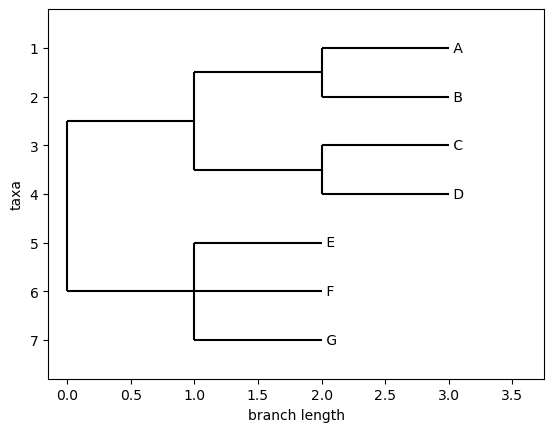

In [3]:
from Bio import Phylo

tree = Phylo.read("simple.dnd", "newick")
print(tree)

Phylo.draw_ascii(tree)

tree.rooted = True
Phylo.draw(tree)

The function draw_ascii creates a simple ASCII-art (plain text) dendrogram. This is a convenient visualization for interactive exploration, in case better graphical tools aren’t available.

In [4]:
from Bio import Phylo
tree = Phylo.read("simple.dnd", "newick")
Phylo.draw_ascii(tree)

                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
  ________________________|
 |                        |                         ________________________ C
 |                        |________________________|
_|                                                 |________________________ D
 |
 |                         ________________________ E
 |                        |
 |________________________|________________________ F
                          |
                          |________________________ G



### 13.1.1 Coloring branches within a tree

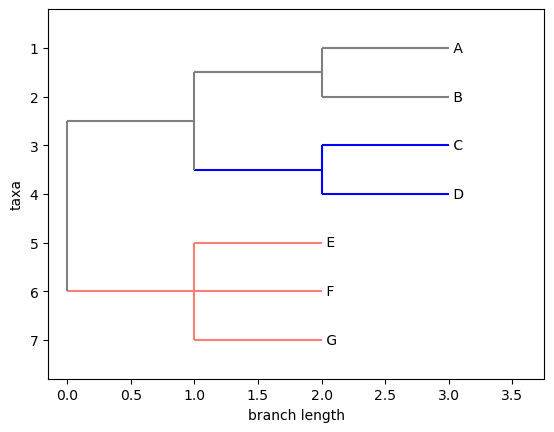

In [5]:
from Bio.Phylo.PhyloXML import Phylogeny
tree = Phylo.read("simple.dnd", "newick")
tree = Phylogeny.from_tree(tree)
tree.root.color = "gray" # or (128,128,128) or "#808080"
mrca = tree.common_ancestor({"name": "E"}, {"name": "F"})
mrca.color = "salmon"
tree.clade[0, 1].color = "blue"
Phylo.draw(tree)

In [6]:
import sys
n = Phylo.write(tree, sys.stdout, "phyloxml")
n

<phyloxml xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.phyloxml.org" xsi:schemaLocation="http://www.phyloxml.org http://www.phyloxml.org/1.10/phyloxml.xsd">
  <phylogeny rooted="false">
    <clade>
      <color>
        <red>128</red>
        <green>128</green>
        <blue>128</blue>
      </color>
      <clade>
        <clade>
          <clade>
            <name>A</name>
          </clade>
          <clade>
            <name>B</name>
          </clade>
        </clade>
        <clade>
          <color>
            <red>0</red>
            <green>0</green>
            <blue>255</blue>
          </color>
          <clade>
            <name>C</name>
          </clade>
          <clade>
            <name>D</name>
          </clade>
        </clade>
      </clade>
      <clade>
        <color>
          <red>250</red>
          <green>128</green>
          <blue>114</blue>
        </color>
        <clade>
          <name>E</name>
        </clade>
        <clade

1

## 13.2 I/O functions
* Download test file: [`int_node_labels.nwk`](https://github.com/biopython/biopython/blob/master/Tests/Nexus/int_node_labels.nwk)

In [7]:
from Bio import Phylo
tree = Phylo.read("int_node_labels.nwk", "newick")
print(tree) # doctest:+ELLIPSIS

Tree(rooted=False, weight=1.0)
    Clade(branch_length=75.0, name='gymnosperm')
        Clade(branch_length=25.0, name='Coniferales')
            Clade(branch_length=25.0)
                Clade(branch_length=10.0, name='Tax+nonSci')
                    Clade(branch_length=90.0, name='Taxaceae')
                        Clade(branch_length=125.0, name='Cephalotaxus')
                        Clade(branch_length=25.0, name='TT1')
                            Clade(branch_length=100.0, name='Taxus')
                            Clade(branch_length=100.0, name='Torreya')
                    Clade(branch_length=15.0, name='nonSci')
                        Clade(branch_length=15.11, name='Taw+others')
                            Clade(branch_length=49.060001, name='STCC')
                                Clade(branch_length=5.83, name='CupCallTax')
                                    Clade(branch_length=30.0, name='CJCPTT')
                                        Clade(branch_length=5.0, name='CC

* Download test file: [`phyloxml_examples.xml`](https://github.com/biopython/biopython/blob/master/Tests/PhyloXML/phyloxml_examples.xml)

In [8]:
trees = Phylo.parse("phyloxml_examples.xml", "phyloxml")
for tree in trees:
    print(tree) # doctest:+ELLIPSIS

Phylogeny(description='phyloXML allows to use either a "branch_length" attribute...', name='example from Prof. Joe Felsenstein's book "Inferring Phyl...', rooted=True)
    Clade()
        Clade(branch_length=0.06)
            Clade(branch_length=0.102, name='A')
            Clade(branch_length=0.23, name='B')
        Clade(branch_length=0.4, name='C')
Phylogeny(description='phyloXML allows to use either a "branch_length" attribute...', name='example from Prof. Joe Felsenstein's book "Inferring Phyl...', rooted=True)
    Clade()
        Clade(branch_length=0.06)
            Clade(branch_length=0.102, name='A')
            Clade(branch_length=0.23, name='B')
        Clade(branch_length=0.4, name='C')
Phylogeny(name='same example, with support of type "bootstrap"', rooted=True)
    Clade()
        Clade(branch_length=0.06, name='AB')
            Confidence(type='bootstrap')
            Clade(branch_length=0.102, name='A')
            Clade(branch_length=0.23, name='B')
        Clade(branc

Write a tree or iterable of trees back to file with the `write` function:

In [9]:
trees = Phylo.parse("phyloxml_examples.xml", "phyloxml")
tree1 = next(trees)
Phylo.write(tree1, "tree1.nwk", "newick")
Phylo.write(trees, "other_trees.xml", "phyloxml") # write the remaining trees

12

Convert files between any of the supported formats with the `convert` function:

In [10]:
Phylo.convert("tree1.nwk", "newick", "tree1.xml", "nexml")
Phylo.convert("other_trees.xml", "phyloxml", "other_trees.nex", "nexus")

12

To use strings as input or output instead of actual files, use StringIO as you would with SeqIO and AlignIO:

In [11]:
from Bio import Phylo
from io import StringIO
handle = StringIO("(((A,B),(C,D)),(E,F,G));")
tree = Phylo.read(handle, "newick")
tree

Tree(rooted=False, weight=1.0)

## 13.3 View and export trees
* Download test file: [`example.xml`](https://github.com/biopython/biopython/blob/master/Tests/PhyloXML/example.xml)

In [12]:
from Bio import Phylo
tree = Phylo.read("example.xml", "phyloxml")
print(tree)

Phylogeny(description='phyloXML allows to use either a "branch_length" attribute...', name='example from Prof. Joe Felsenstein's book "Inferring Phyl...', rooted=True)
    Clade()
        Clade(branch_length=0.06)
            Clade(branch_length=0.102, name='A')
            Clade(branch_length=0.23, name='B')
        Clade(branch_length=0.4, name='C')


In [13]:
tree = Phylo.read("example.xml", "phyloxml")
Phylo.draw_ascii(tree)

             __________________ A
  __________|
_|          |___________________________________________ B
 |
 |___________________________________________________________________________ C



The draw function draws a more attractive image using the matplotlib library.

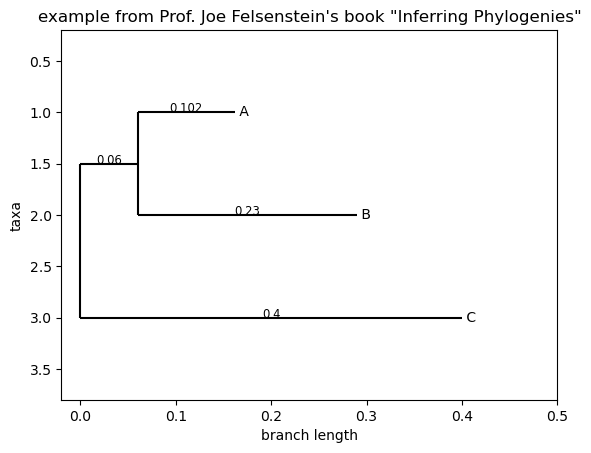

In [14]:
Phylo.draw(tree, branch_labels=lambda c: c.branch_length)

## 13.4 Using Tree and Clade objects
### 13.4.1 Search and traversal methods

`get_terminals`
: makes a list of all of this tree’s terminal (leaf) nodes.

`get_nonterminals`
: makes a list of all of this tree’s nonterminal (internal) nodes.

These both wrap a method with full control over tree traversal, `find_clades`. Two more traversal methods, `find_elements` and `find_any`, rely on the same core functionality and accept the same arguments, which we’ll call a “target specification” for lack of a better description. These specify which objects in the tree will be matched and returned during iteration. The first argument can be any of the following types:

- A **TreeElement instance**, which tree elements will match by identity — so searching with a Clade instance as the target will find that clade in the tree;
- A **string**, which matches tree elements’ string representation — in particular, a clade’s `name` *(added in Biopython 1.56)*;
- A **class** or **type**, where every tree element of the same type (or sub-type) will be matched;
- A **dictionary** where keys are tree element attributes and values are matched to the corresponding attribute of each tree element. This one gets even more elaborate:
- A function taking a single argument (it will be applied to each element in the tree), returning True or False. For convenience, LookupError, AttributeError and ValueError are silenced, so this provides another safe way to search for floating-point values in the tree, or some more complex characteristic.

After the target, there are two optional keyword arguments:

terminal
— A boolean value to select for or against terminal clades (a.k.a. leaf nodes): True searches for only terminal clades, False for non-terminal (internal) clades, and the default, None, searches both terminal and non-terminal clades, as well as any tree elements lacking the is_terminal method.

order
— Tree traversal order: "preorder" (default) is depth-first search, "postorder" is DFS with child nodes preceding parents, and "level" is breadth-first search.

## Information methods
These methods provide information about the whole tree (or any clade).

- common_ancestor
Find the most recent common ancestor of all the given targets. (This will be a Clade object). If no target is given, returns the root of the current clade (the one this method is called from); if 1 target is given, this returns the target itself. However, if any of the specified targets are not found in the current tree (or clade), an exception is raised.
- count_terminals
Counts the number of terminal (leaf) nodes within the tree.
- depths
Create a mapping of tree clades to depths. The result is a dictionary where the keys are all of the Clade instances in the tree, and the values are the distance from the root to each clade (including terminals). By default the distance is the cumulative branch length leading to the clade, but with the unit_branch_lengths=True option, only the number of branches (levels in the tree) is counted.
- distance
Calculate the sum of the branch lengths between two targets. If only one target is specified, the other is the root of this tree.
total_branch_length
Calculate the sum of all the branch lengths in this tree. This is usually just called the “length” of the tree in phylogenetics, but we use a more explicit name to avoid confusion with Python terminology.


The rest of these methods are boolean checks:

- is_bifurcating
True if the tree is strictly bifurcating; i.e. all nodes have either 2 or 0 children (internal or external, respectively). The root may have 3 descendents and still be considered part of a bifurcating tree.

- is_monophyletic
Test if all of the given targets comprise a complete subclade — i.e., there exists a clade such that its terminals are the same set as the given targets. The targets should be terminals of the tree. For convenience, this method returns the common ancestor (MCRA) of the targets if they are monophyletic (instead of the value True), and False otherwise.

- is_parent_of
True if target is a descendent of this tree — not required to be a direct descendent. To check direct descendents of a clade, simply use list membership testing: if subclade in clade: ...

- is_preterminal
True if all direct descendents are terminal; False if any direct descendent is not terminal.

### Modification methods

In [15]:
#  keep the original tree intact, make a complete copy of the tree
tree = Phylo.read("example.xml", "phyloxml")
import copy

newtree = copy.deepcopy(tree)

In [16]:
newtree

Phylogeny(description='phyloXML allows to use either a "branch_length" attribute...', name='example from Prof. Joe Felsenstein's book "Inferring Phyl...', rooted=True)

* Download test file:
[`random.phy`](https://github.com/biopython/biopython/blob/master/Tests/Phylip/random.phy), 
[`alignment.phylip`](https://github.com/biopython/biopython/blob/master/Tests/PAML/Alignments/alignment.phylip), 
[`species.tree`](https://github.com/biopython/biopython/blob/master/Tests/PAML/Trees/species.tree), 
[`NSsite3-4_1.out`](https://github.com/biopython/biopython/blob/master/Tests/PAML/Results/codeml/NSsite3/NSsite3-4_1.out)

In [17]:
!conda install -y -c bioconda phyml

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/leejh/anaconda3/envs/biopython

  added / updated specs:
    - phyml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.05.30 |       h06a4308_0         120 KB
    ------------------------------------------------------------
                                           Total:         120 KB

The following packages will be UPDATED:

  ca-certificates                     2023.01.10-h06a4308_0 --> 2023.05.30-h06a4308_0 None



ca-certificates-2023 | 120 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...workin

In [18]:
import subprocess
cmd = "phyml -i ./random.phy"
results = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE, text=True)

In [19]:
from Bio import Phylo
tree = Phylo.read("random.phy_phyml_tree.txt", "newick")
#tree = Phylo.read("random.phy", "newick")
Phylo.draw_ascii(tree)

  _______ B
 |
 |_______________________ A
_|
 |               , E
 |               |
 |_______________|               , G
                 |               |
                 |               |        ________ C
                 |_______________|_______|
                                 |       |        , J
                                 |       |________|
                                 |                |          , H
                                 |                |__________|
                                 |                           |_____________ D
                                 |
                                 |            __________________ F
                                 |___________|
                                             | I



In [20]:
!conda install -y -c bioconda paml

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [21]:
from Bio.Phylo.PAML import codeml
cml = codeml.Codeml()
cml.alignment = "alignment.phylip"
cml.tree = "species.tree"
cml.out_file = "results.out"
cml.working_dir = "./scratch"
cml.set_options(
    seqtype=1,
    verbose=0,
    noisy=0,
    RateAncestor=0,
    model=0,
    NSsites=[0, 1, 2],
    CodonFreq=2,
    cleandata=1,
    fix_alpha=1,
    kappa=4.54006,
)

In [22]:
results = cml.run()
ns_sites = results.get("NSsites")
m0 = ns_sites.get(0)
m0_params = m0.get("parameters")
print(m0_params.get("omega"))

0.0001


In [23]:
results = codeml.read("NSsite3-4_1.out")
print(results.get("lnL max"))

None
